In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [4]:
df1=df.reset_index()['close']

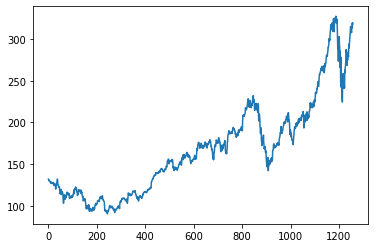

In [5]:
plt.plot(df1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
print(df1.shape)

(1258, 1)


In [8]:
df1


array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [9]:
traning_size=int(len(df1)*0.65)
test_size=len(df1)-traning_size
traning_data,test_data=df1[0:traning_size,:],df1[traning_size:len(df1):1]

In [10]:
traning_size,test_size

(817, 441)

In [11]:
def create_dataset(dataset, time_step=1):
    datax,datay = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [12]:
time_step=100
x_train,y_train=create_dataset(traning_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [13]:
x_train.shape,y_train.shape

((716, 100), (716,))

In [14]:
x_test.shape,y_test.shape

((340, 100), (340,))

In [15]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 17s 24ms/sample - loss: 0.0149 - val_loss: 0.0588
Epoch 2/100
716/716 [==============================] - 4s 6ms/sample - loss: 0.0032 - val_loss: 0.0047
Epoch 3/100
716/716 [==============================] - 4s 6ms/sample - loss: 9.0230e-04 - val_loss: 0.0042
Epoch 4/100
716/716 [==============================] - 4s 6ms/sample - loss: 7.5044e-04 - val_loss: 0.0047
Epoch 5/100
716/716 [==============================] - 4s 6ms/sample - loss: 6.1456e-04 - val_loss: 0.0057
Epoch 6/100
716/716 [==============================] - 4s 6ms/sample - loss: 5.9483e-04 - val_loss: 0.0043
Epoch 7/100
716/716 [==============================] - 4s 6ms/sample - loss: 5.8958e-04 - val_loss: 0.0042
Epoch 8/100
716/716 [==============================] - 4s 6ms/sample - loss: 5.8802e-04 - val_loss: 0.0041
Epoch 9/100
716/716 [==============================] - 4s 6ms/sample - loss: 6.6426e-04 - val_loss: 0.00

In [20]:
train_prediction=model.predict(x_train)
test_prediction=model.predict(x_test)

In [21]:
train_prediction=scaler.inverse_transform(train_prediction)
test_prediction=scaler.inverse_transform(test_prediction)

In [22]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_prediction))

142.02115294131357

In [23]:
math.sqrt(mean_squared_error(y_test,test_prediction))

236.53331084174724

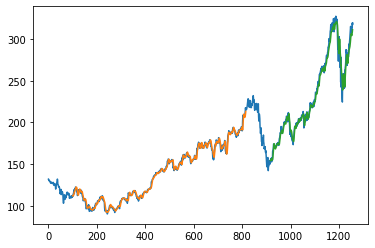

In [24]:
look_back=100
trainpredictionplot=np.empty_like(df1)
trainpredictionplot[:,:]=np.nan
trainpredictionplot[look_back:len(train_prediction)+look_back, :] = train_prediction
testpredictionplot=np.empty_like(df1)
testpredictionplot[:,:]=np.nan
testpredictionplot[len(train_prediction)+(look_back*2)+1:len(df1)-1, :] = test_prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictionplot)
plt.plot(testpredictionplot)
plt.show()

In [25]:
len(test_data)

441

In [26]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
temp_input

[0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.8232711306256861,
 0.7814320695769654,
 0.6665963016127672,
 0.7921557037912694,
 0.6411804441442204,
 0.6861437135860848,
 0.6600101325677616,
 0.6520307354555435,
 0.5864223591995272,
 0.5658616904500551,
 0.660896732246897,
 0.6551549438486872,
 0.7097019336316812,
 0.664527569028118,
 0.6943764248923416,
 0.692181035210673,
 0.6356919699400492,
 0.6526640209406402,
 0.637802921557038,
 0.7267162036646122,
 0.7138816178333194,
 0.7419150553069325,
 0.7500211095161702,
 0.7722283205268936,
 0.8304905851557884,
 0.8194291986827664,
 0.8289706999915563,
 0.8125474964113824,
 0.7877649244279323,
 0.7516254327450818,
 0.78426074474373

In [31]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.927932

In [68]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [69]:
len(df1)

1258

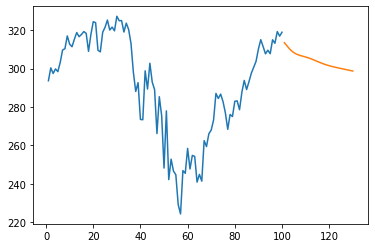

In [70]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

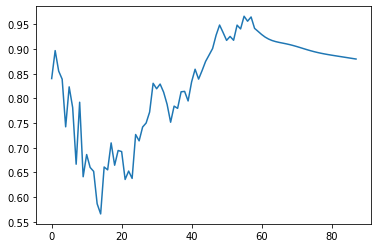

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [72]:
df3=scaler.inverse_transform(df3).tolist()

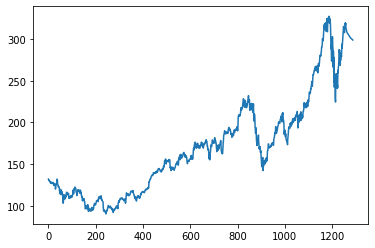

In [73]:
plt.plot(df3)